In [1]:
# import sys
# from pathlib import Path
# root_dir = Path().resolve().parent  # goes one level up from `test/`
# sys.path.insert(0, str(root_dir))

In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotsense import  recommender, plotgen, explainer


In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
titanic = sns.load_dataset("titanic")

<Axes: title={'center': 'Titanic Dataset'}, xlabel='age', ylabel='Count'>

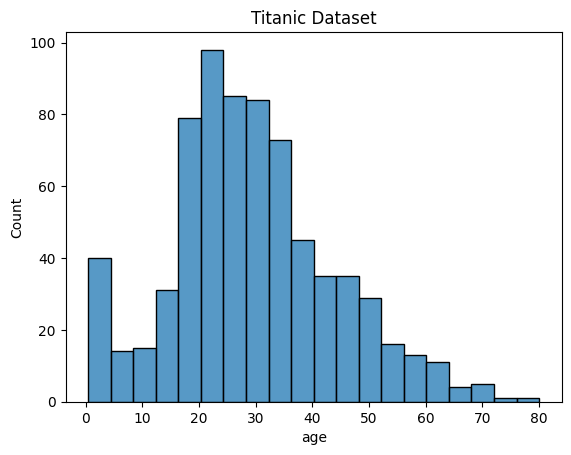

In [5]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
ax1.set_title("Titanic Dataset")
sns.histplot(data=titanic, x="age", ax=ax1) 


In [6]:
data = r"PLD Data for Hackathon.xlsx"

In [7]:
hack = pd.read_excel(data, nrows=500)


In [8]:
hack.head()

,Count of id,id,lpa_name,status,valid_date,decision,decision_date,total_gained_units,total_lost_units,Total Net Units,...,remaining_gained_units,remaining_lost_units,actual_commencement_date,actual_completion_date,application_type,application_type_full,description,appeal_decision,appeal_decision_date,development_type
0,1,Wandsworth-2024_4282,Wandsworth,Approved,2024-12-06,Approved,2025-04-22,8,0,8,...,8,0,NaT,NaN,All Other,Full planning permission,Alterations including erection of roof extensi...,NaN,NaT,Minor dwellings
1,1,Barnet-25_0634_FUL,Barnet,Refused,2025-02-21,Refused,2025-04-17,2,2,0,...,2,2,NaT,NaN,All Other,Full planning permission,Two storey side/rear extension with pitched ro...,NaN,NaT,NaN
2,1,Barnet-25_0702_FUL,Barnet,Refused,2025-02-20,Refused,2025-04-17,1,0,1,...,1,0,NaT,NaN,All Other,Full planning permission,Erection of a single storey dwelling. Associat...,NaN,NaT,NaN
3,1,Bexley-25_00319_PRIOR,Bexley,Refused,2025-02-21,Refused,2025-04-17,2,0,2,...,2,0,NaT,NaN,Prior Approval,"Prior Approval: Change of use from Commercial,...",Notification of Prior Approval for change of u...,NaN,NaT,NaN
4,1,Bexley-25_00330_FUL,Bexley,Approved,2025-02-20,Approved,2025-04-17,0,1,-1,...,0,1,NaT,NaN,All Other,Full planning permission,Change of Use from Class C3 (Residential Dwell...,NaN,NaT,NaN


In [9]:
recommendation = recommender(hack)
recommendation

,plot_type,variables,ensemble_score,model_agreement,source_models
0,hist,total_gained_units,0.50,2,"[llama3-70b-8192, llama-3.3-70b-versatile]"
1,boxplot,"total_gained_units, application_type",0.50,2,"[llama3-70b-8192, llama-3.3-70b-versatile]"
2,line,"valid_date, Total Net Units",0.50,2,"[llama3-70b-8192, llama-3.3-70b-versatile]"
3,scatter,"Remaining Units Net, total_gained_units",0.25,1,[llama3-70b-8192]
4,bar,"total_lost_units, development_type",0.25,1,[llama3-70b-8192]


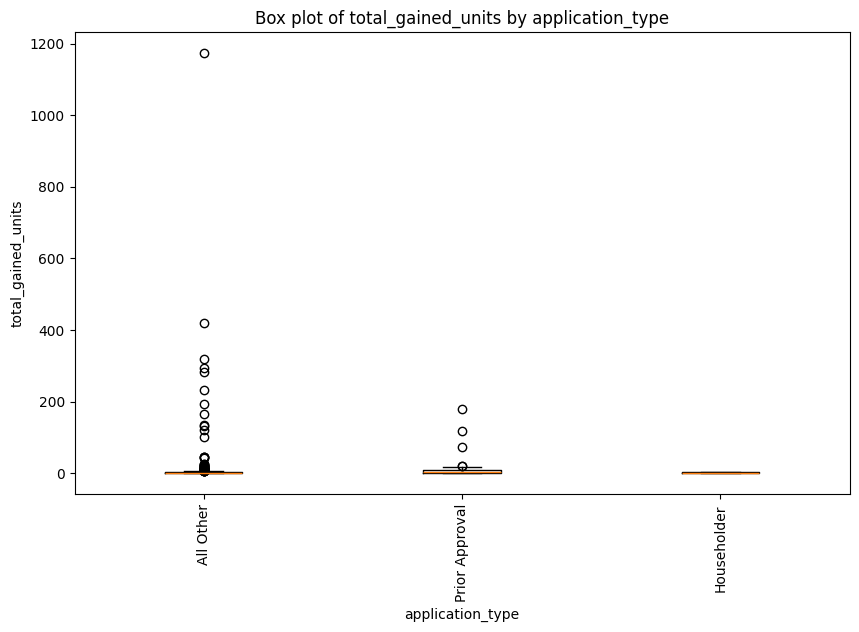

In [10]:
fig=plotgen(hack, recommendation.iloc[1])

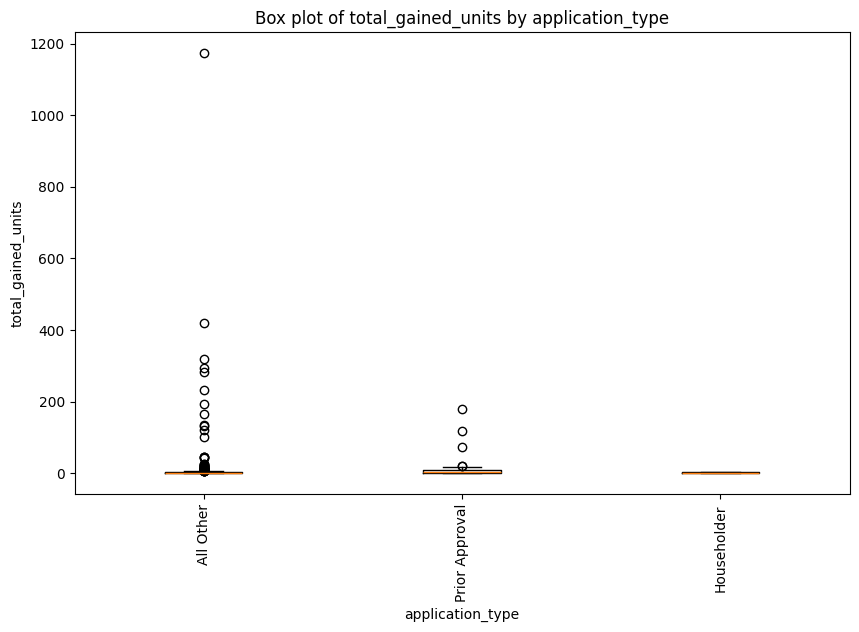

In [11]:
fig = plotgen(hack, 1, recommendation)

In [12]:
explanation = explainer(fig1)
print("Generated Explanation:")
print(explanation)

Generated Explanation:
## Overview
The provided histogram offers a visual representation of the age distribution within the Titanic dataset, which is a well-known collection of data regarding the passengers and crew of the RMS Titanic. The histogram effectively organizes the data into specified age ranges, providing a clear visual representation of the distribution. The majority of individuals in the dataset are between 15 and 40 years old, with a peak frequency around 20-25 years old. The histogram's blue bars provide a clear and concise visual representation of the age distribution.

## Key Features
* **X-axis:** The x-axis represents the age of individuals, ranging from 0 to 80 years, divided into bins of exactly 5 years each.
* **Y-axis:** The y-axis represents the count or frequency of individuals within each age group, ranging from 0 to 100.
* **Bars:** The histogram consists of blue bars, each representing a specific age range. The height of each bar corresponds to the count of 